In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the Dataset

In [18]:
file_path = os.path.expanduser("~/Downloads/wdbc.data")

In [19]:
columns = [
    "id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean",
    "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se",
    "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
    "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst",
    "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]

In [20]:
df = pd.read_csv(file_path, header=None, names=columns)

Initial Data Exploration

In [21]:
print(df.head())
print("\n")

df.info()
print("\n")

print(df.describe().T)
print("\n")

print(df['diagnosis'].value_counts())
print("\n")

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Data Cleaning and Preprocessing

In [22]:
print("Missing values per column:")
print(df.isnull().sum())
print("\n")

print(f"Number of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")
    print("\n")

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("Dropped the 'id' column as it's not a relevant feature.")
    print("\n")

Missing values per column:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Number of duplicate rows: 0
Dr

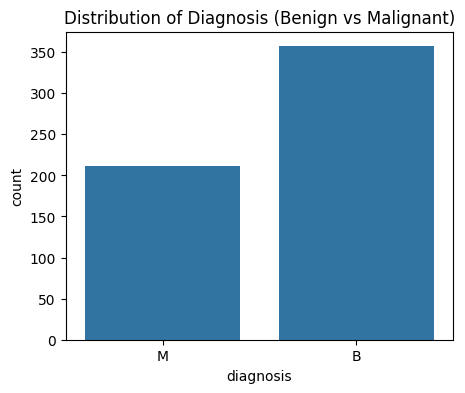

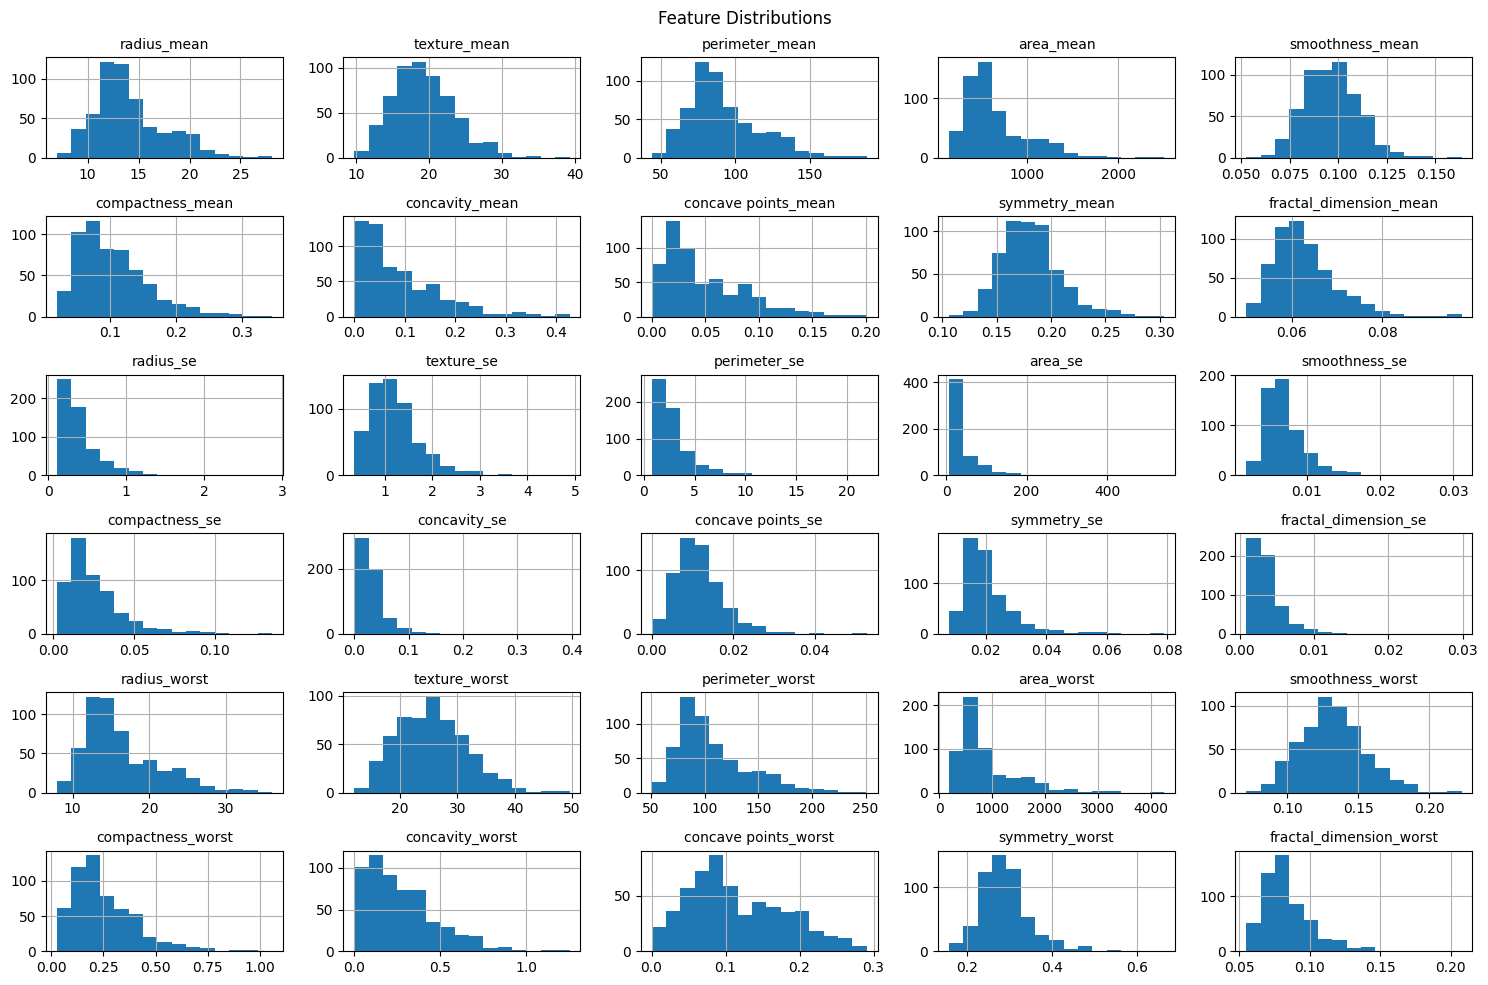

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (Benign vs Malignant)')
plt.show()

num_features = df.select_dtypes(include=np.number).columns

df[num_features].hist(bins=15, figsize=(15,10))
plt.suptitle('Feature Distributions', fontsize=12)
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.set_title(ax.get_title(), fontsize=10)
plt.tight_layout()
plt.show()

Final Dataset Info after Cleaning

In [ ]:
print("Final DataFrame shape:", df.shape)

print("Final DataFrame columns:", df.columns.tolist())

print("\nFinal DataFrame head:")

print(df.head())

Final DataFrame shape: (569, 31)
Final DataFrame columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Final DataFrame head:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M    

Feature Engineering (Standardization)

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


Correlation Visualization

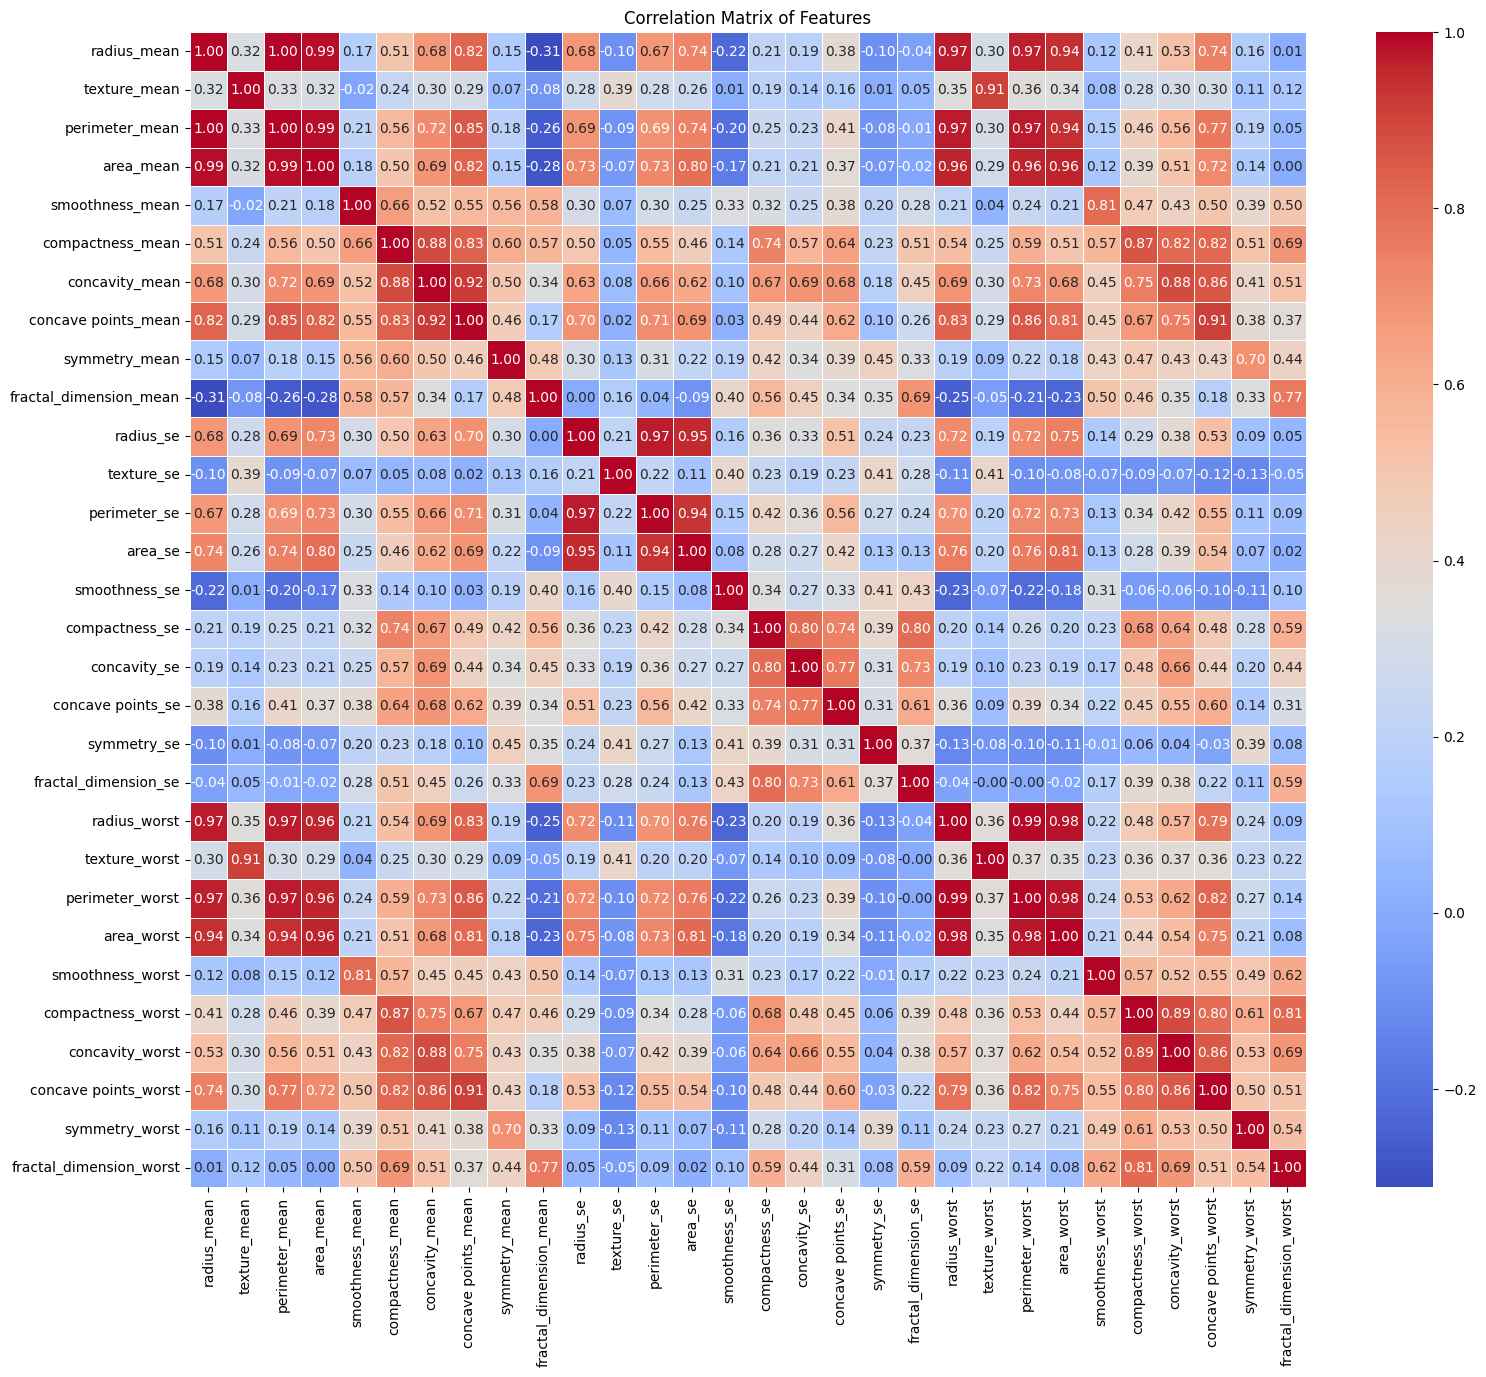

In [ ]:
plt.figure(figsize=(18, 15))
corr_matrix = X_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

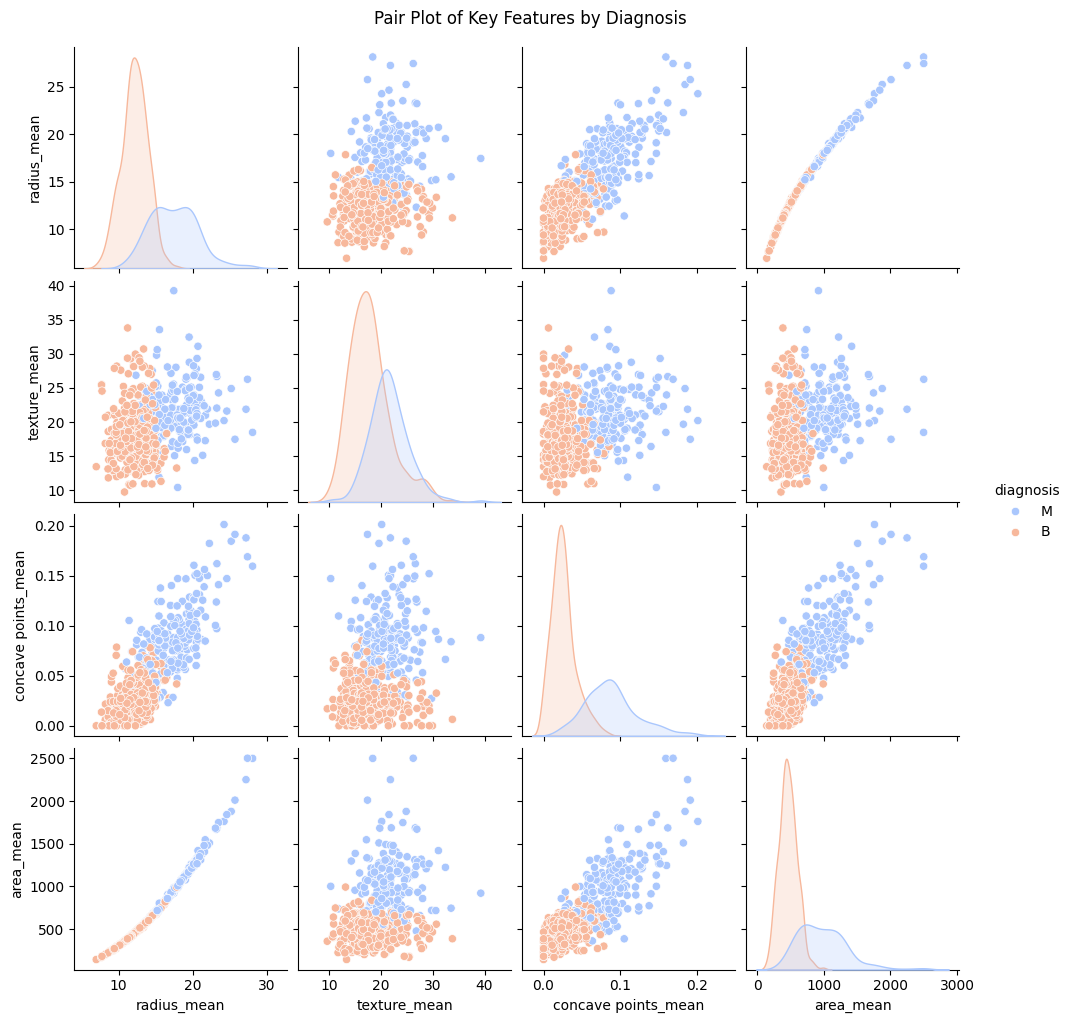

In [ ]:
features_subset = ['radius_mean', 'texture_mean', 'concave points_mean', 'area_mean']
df_subset = df[features_subset + ['diagnosis']]
sns.pairplot(df_subset, hue='diagnosis', palette='coolwarm')
plt.suptitle('Pair Plot of Key Features by Diagnosis', y=1.02)
plt.show()

Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Accuracy: {lr_accuracy:.4f}")
    
print(classification_report(y_test, lr_predictions, target_names=['benign (0)', 'malignant (1)']))

print(confusion_matrix(y_test, lr_predictions))

Accuracy: 0.9737
               precision    recall  f1-score   support

   benign (0)       0.97      0.99      0.98        71
malignant (1)       0.98      0.95      0.96        43

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114

[[70  1]
 [ 2 41]]


Decision Tree

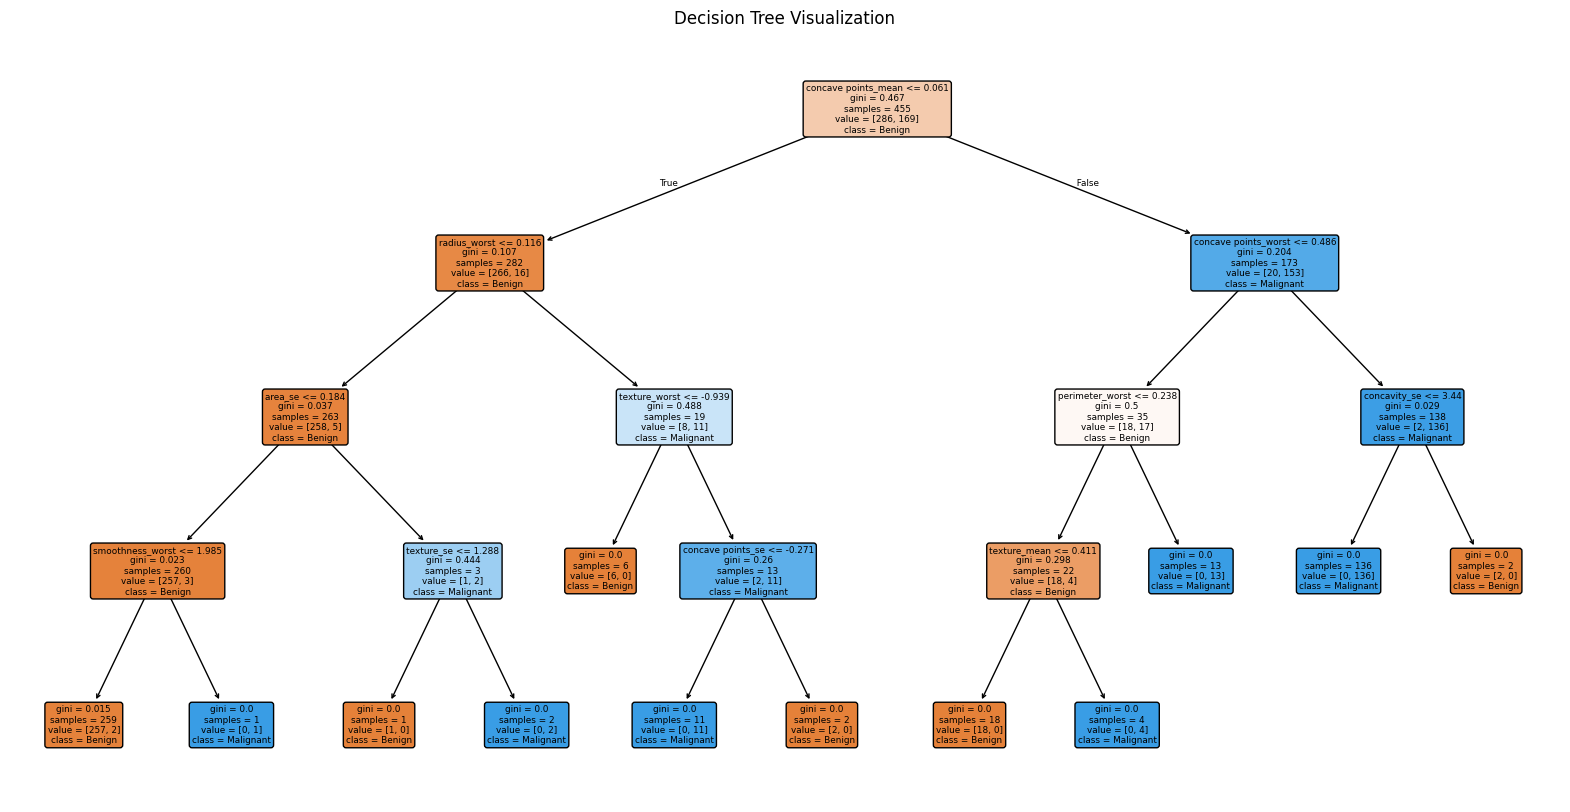

Accuracy: 0.9474
               precision    recall  f1-score   support

   benign (0)       0.96      0.96      0.96        71
malignant (1)       0.93      0.93      0.93        43

     accuracy                           0.95       114
    macro avg       0.94      0.94      0.94       114
 weighted avg       0.95      0.95      0.95       114

[[68  3]
 [ 3 40]]


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=["Benign", "Malignant"], 
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Accuracy: {dt_accuracy:.4f}")
print(classification_report(y_test, dt_predictions, target_names=['benign (0)', 'malignant (1)']))
print(confusion_matrix(y_test, dt_predictions))